In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
from math import sqrt
from kneed import KneeLocator
from scipy.cluster.hierarchy import dendrogram, linkage
from mlxtend.frequent_patterns import apriori, association_rules
!pip install kneed
! pip install imblearn

EDA

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/kimikato123/Billy-Agustian-Dharmawan_ALP_0706022010030/main/Dataset_Terapi_Kelenjar_Getah_Bening.csv')
df

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
0,1,15,11.00,6.0,1.0,30,25.0,0
1,1,27,11.75,NaN,1.0,208,6.0,0
2,1,32,12.00,9.0,1.0,43,50.0,0
3,1,33,1.75,7.0,2.0,379,7.0,0
4,1,34,5.00,7.0,3.0,64,7.0,0
...,...,...,...,...,...,...,...,...
85,2,51,4.00,1.0,1.0,65,7.0,1
86,2,51,6.00,6.0,NaN,80,2.0,1
87,2,52,2.25,5.0,1.0,63,7.0,1
88,2,53,10.00,1.0,2.0,30,25.0,1


In [3]:
df.describe()

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
count,90.000000,90.000000,87.000000,89.000000,85.000000,90.000000,88.000000,90.000000
mean,1.544444,31.044444,7.221264,6.123596,1.752941,95.700000,14.500000,0.788889
std,0.500811,12.235435,3.151325,4.231431,0.829599,136.614643,17.378147,0.410383
min,1.000000,15.000000,1.000000,1.000000,1.000000,6.000000,2.000000,0.000000
25%,1.000000,20.250000,5.000000,2.000000,1.000000,35.500000,5.000000,1.000000
50%,2.000000,28.500000,7.750000,6.000000,2.000000,53.000000,7.000000,1.000000
75%,2.000000,41.750000,10.000000,9.000000,2.000000,80.750000,9.000000,1.000000
max,2.000000,56.000000,12.000000,19.000000,3.000000,900.000000,70.000000,1.000000


In [4]:
df.isnull().sum()

gender                 0
age                    0
Time                   3
Number_of_Warts        1
Type                   5
Area                   0
induration_diameter    2
Result_of_Treatment    0
dtype: int64

In [5]:
df.duplicated().any()

False

Data Preprocessing

In [6]:
import pandas as pd
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
df_KNN = pd.DataFrame(imputer.fit_transform(df),columns = df.columns)
df_KNN.isnull().sum()

gender                 0
age                    0
Time                   0
Number_of_Warts        0
Type                   0
Area                   0
induration_diameter    0
Result_of_Treatment    0
dtype: int64

In [7]:
df1 = df_KNN.copy()
df1['Result_of_Treatment'] = df1['Result_of_Treatment'].replace(0, 'Tidak Ada Kemajuan')
df1['Result_of_Treatment'] = df1['Result_of_Treatment'].replace(1, 'Ada Kemajuan')
df1['gender'] = df1['gender'].replace(2, 'Female')
df1['gender'] = df1['gender'].replace(1, 'Male')
df1

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
0,Male,15.0,11.00,6.0,1.0,30.0,25.0,Tidak Ada Kemajuan
1,Male,27.0,11.75,1.5,1.0,208.0,6.0,Tidak Ada Kemajuan
2,Male,32.0,12.00,9.0,1.0,43.0,50.0,Tidak Ada Kemajuan
3,Male,33.0,1.75,7.0,2.0,379.0,7.0,Tidak Ada Kemajuan
4,Male,34.0,5.00,7.0,3.0,64.0,7.0,Tidak Ada Kemajuan
...,...,...,...,...,...,...,...,...
85,Female,51.0,4.00,1.0,1.0,65.0,7.0,Ada Kemajuan
86,Female,51.0,6.00,6.0,1.5,80.0,2.0,Ada Kemajuan
87,Female,52.0,2.25,5.0,1.0,63.0,7.0,Ada Kemajuan
88,Female,53.0,10.00,1.0,2.0,30.0,25.0,Ada Kemajuan


<AxesSubplot:xlabel='Result_of_Treatment', ylabel='Count'>

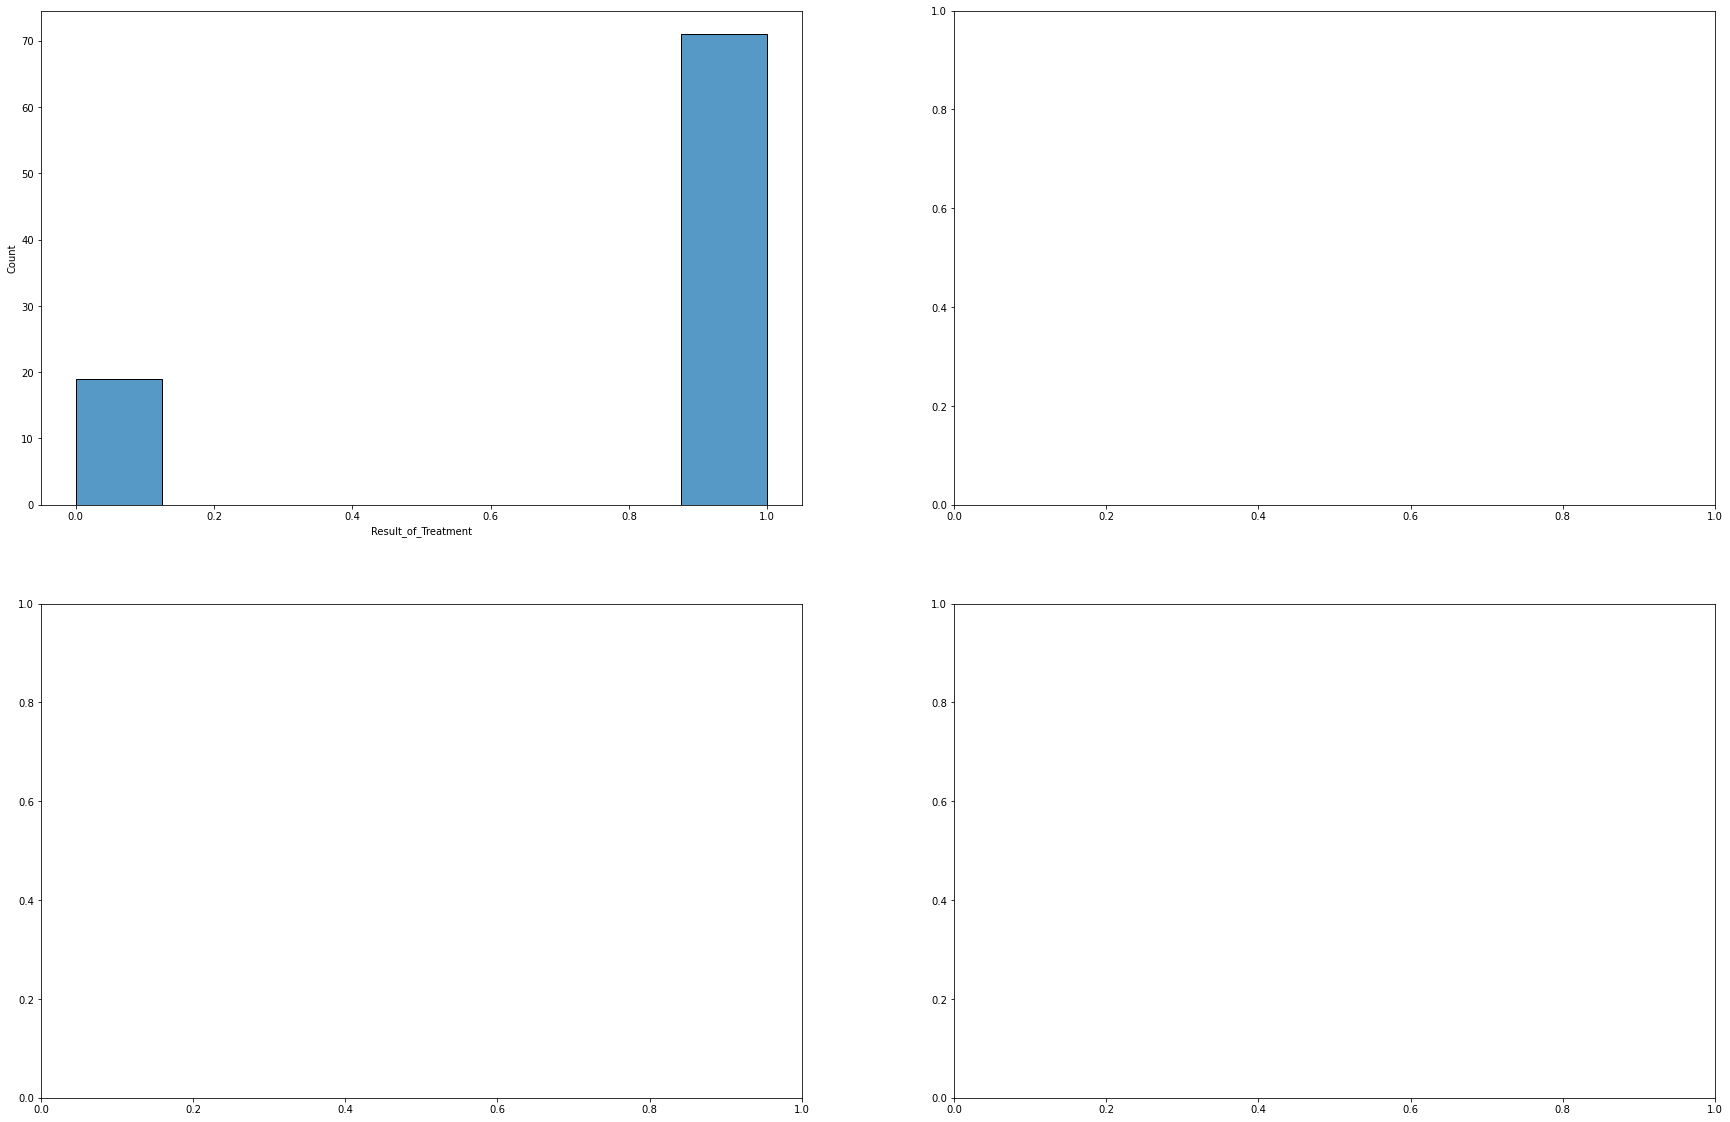

In [8]:
fig,axes = plt.subplots(2,2,figsize=(30,20))
sns.histplot(data=df,x='Result_of_Treatment',ax=axes[0,0])

In [9]:
x = df_KNN.drop(['Result_of_Treatment'],axis=1)
y = df['Result_of_Treatment']

In [10]:
sm = SMOTE(random_state=1)
x_sampling , y_sampling = sm.fit_resample(x,y)

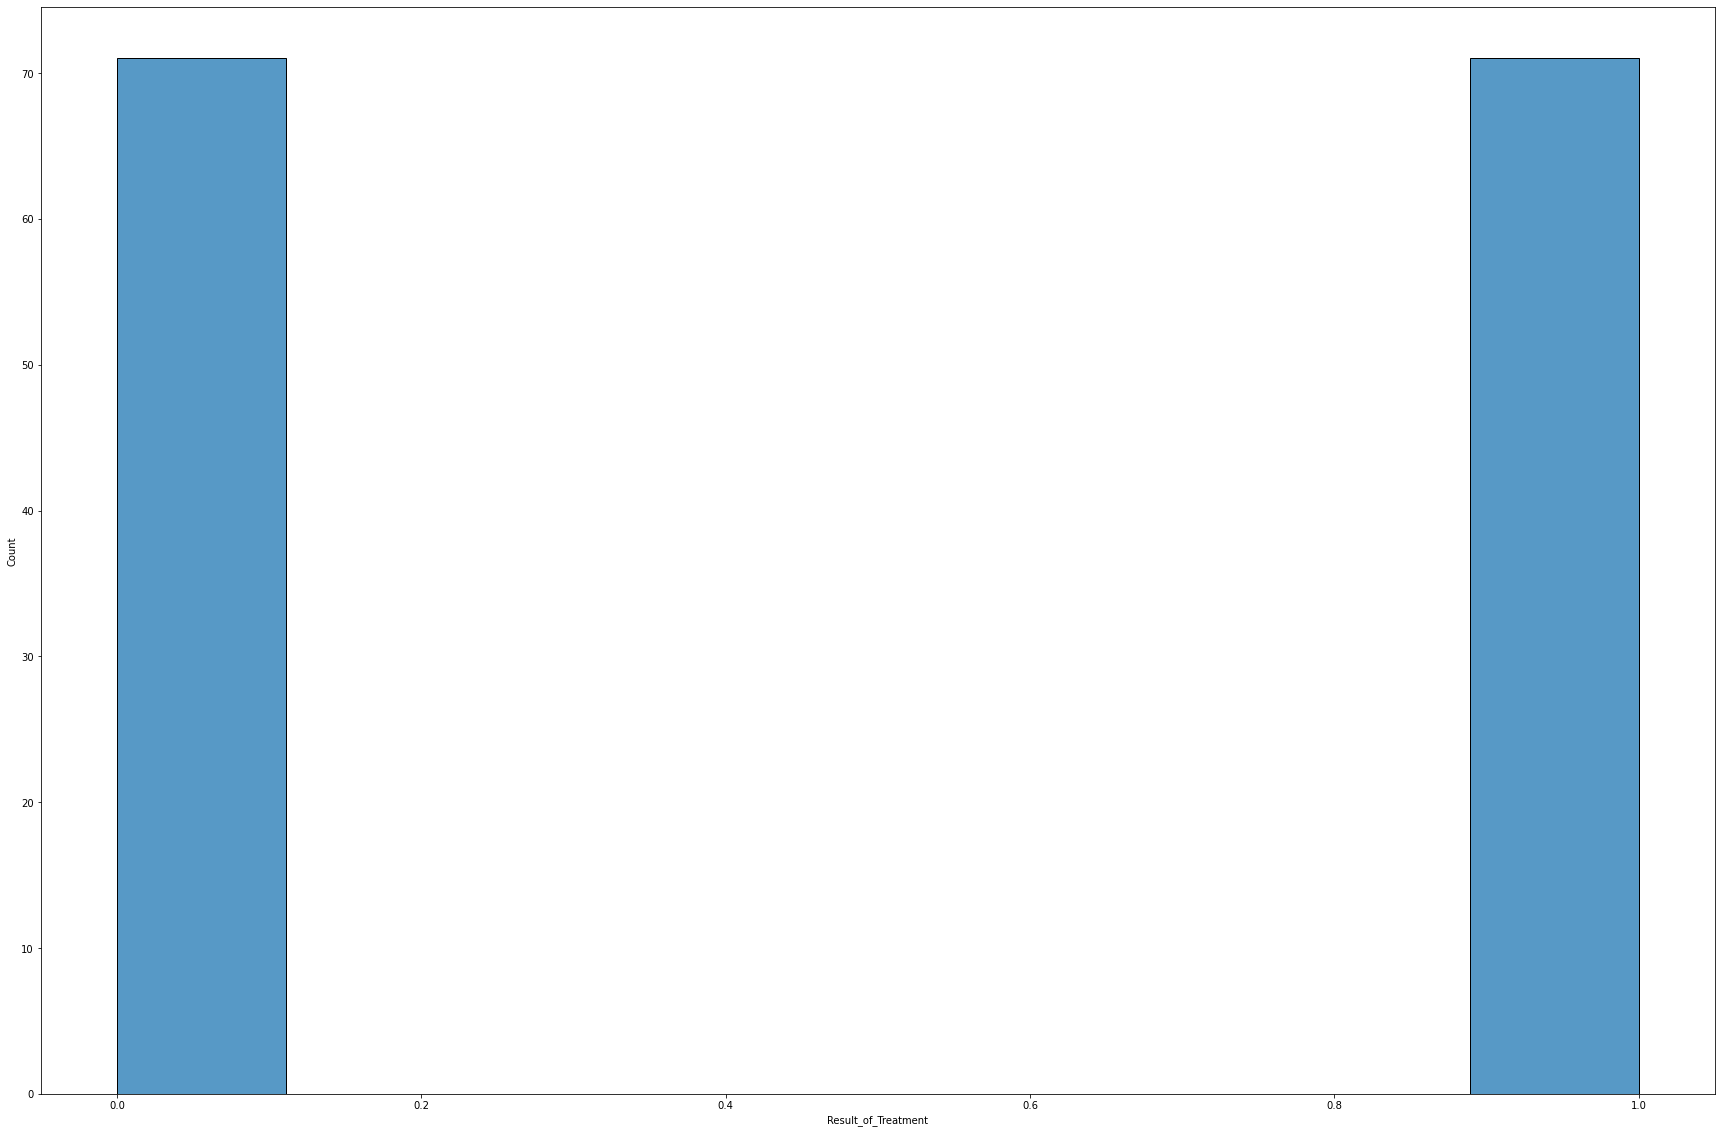

In [11]:
fig = plt.subplots(figsize=(30,20))
sns.histplot(data=y_sampling)
plt.show()

In [12]:
X = df_KNN.iloc[:,:-1];
y = df_KNN.iloc[:,7];

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, shuffle=True)

In [14]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

Logistic Regresion

In [15]:
X_train1, X_test, y_train1, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

In [16]:
classifier = LogisticRegression()
classifier.fit(X_train1, y_train1)
y_pred = classifier.predict(X_test)
print(y_pred)

[1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [17]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n", cm)
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Confusion Matrix
 [[0 2]
 [0 7]]
Accuracy Score:  0.7777777777777778


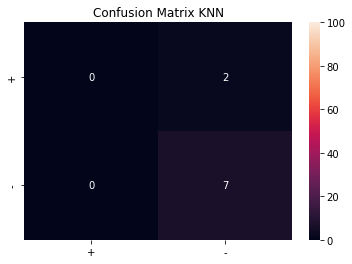

In [18]:
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['+', '-'], yticklabels=['+', '-'], vmax=100, vmin=0)
plt.title('Confusion Matrix KNN')
plt.show()

Classification using Naive Bayes

In [19]:
model = GaussianNB()
model.fit(X,y)

GaussianNB()

In [20]:
y_pred = model.predict(X_test)
print(y_pred)

[0. 0. 1. 1. 1. 1. 1. 1. 1.]


In [21]:
cm2 = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n", cm2)
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Confusion Matrix
 [[2 0]
 [0 7]]
Accuracy Score:  1.0


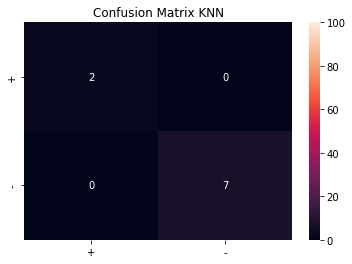

In [22]:
sns.heatmap(cm2, annot=True, fmt='d', xticklabels=['+', '-'], yticklabels=['+', '-'], vmax=100, vmin=0)
plt.title('Confusion Matrix KNN')
plt.show()

Classification using KNN

In [43]:
classifier = KNeighborsClassifier(n_neighbors = 10, metric = "euclidean", p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=10)

In [44]:
y_pred = classifier.predict(X_test)
print(y_pred)

[1. 0. 1. 1. 1. 1. 1. 1. 1.]


In [45]:
cm3 = confusion_matrix(y_test, y_pred)
print("Confusion Matrix\n", cm)
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Confusion Matrix
 [[0 2]
 [0 7]]
Accuracy Score:  0.8888888888888888


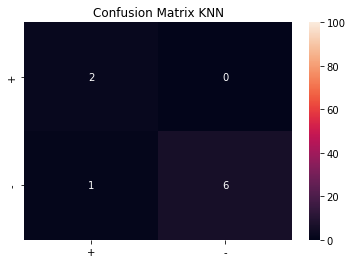

In [26]:
sns.heatmap(cm3, annot=True, fmt='d', xticklabels=['+', '-'], yticklabels=['+', '-'], vmax=100, vmin=0)
plt.title('Confusion Matrix KNN')
plt.show()

Linear Regression

In [27]:
X = df_KNN.drop(['Result_of_Treatment'], axis = 1)
y = df_KNN['Result_of_Treatment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [28]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print(regressor.predict(X_test))

[0.82604462 0.70276638 0.72339332 0.95637629 0.89505696 0.7045288
 0.77059437 0.91191016 0.78146012]


In [29]:
reg = linear_model.LinearRegression()
reg.fit(df_KNN.drop(['Result_of_Treatment'], axis = 1),df_KNN['Result_of_Treatment'])

LinearRegression()

In [30]:
reg.coef_

array([ 0.02042666, -0.00416132, -0.04726091,  0.000682  ,  0.00088226,
        0.00010195, -0.00236522])

In [31]:
reg.intercept_

1.2470704955540142

In [32]:
rms = sqrt(mean_squared_error(y_test, regressor.predict(X_test)))
print(rms)

0.21173497533896965


Clustering

In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
dfscaler = sc.fit_transform(df_KNN.to_numpy())
dfscaler = pd.DataFrame(dfscaler, columns=['gender', 'age', 'Time', 'Number_of_Warts', 'Type', 'Area', 'induration_diameter', 'Result_of_Treatment'])
dfscaler

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
0,-1.093216,-1.318656,1.226795,-0.017146,-0.898251,-0.483609,0.602219,-1.933091
1,-1.093216,-0.332404,1.470261,-1.085490,-0.898251,0.826625,-0.505683,-1.933091
2,-1.093216,0.078535,1.551416,0.695083,-0.898251,-0.387918,2.059985,-1.933091
3,-1.093216,0.160723,-1.775945,0.220264,0.335987,2.085334,-0.447372,-1.933091
4,-1.093216,0.242910,-0.720928,0.220264,1.570225,-0.233339,-0.447372,-1.933091
...,...,...,...,...,...,...,...,...
85,0.914732,1.640101,-1.045549,-1.204195,-0.898251,-0.225979,-0.447372,0.517306
86,0.914732,1.640101,-0.396308,-0.017146,-0.281132,-0.115566,-0.738925,0.517306
87,0.914732,1.722289,-1.613635,-0.254556,-0.898251,-0.240700,-0.447372,0.517306
88,0.914732,1.804477,0.902175,-1.204195,0.335987,-0.483609,0.602219,0.517306


In [48]:
SSE = []
K = range(1,11)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(dfscaler)
 SSE.append(kmeans.inertia_)

D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

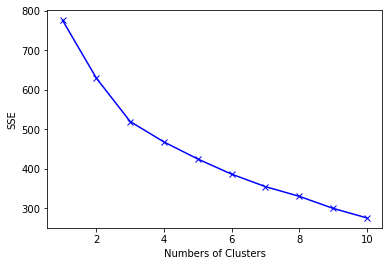

In [49]:
plt.plot(K, SSE,'bx-')
plt.xlabel('Numbers of Clusters') 
plt.ylabel('SSE') 
plt.show()

In [36]:
k = KneeLocator(range(1,11), sse, curve='convex', direction='decreasing')
print('Elbow/Knee: ', k.elbow)

Elbow/Knee:  4


In [50]:
kmeans = KMeans(init="random",n_clusters=4,max_iter=300,random_state=0)
pred = kmeans.fit_predict(dfscaler)
pred
dfscaler['K Means'] = pred

D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [51]:
dfscaler.groupby('K Means').agg(
gender = ('gender', pd.Series.mean), 
age = ('age', pd.Series.mean),
Time = ('Time', pd.Series.mean),
Number_of_Warts = ('Number_of_Warts', pd.Series.mean),
Type = ('Type', pd.Series.mean),
Area = ('Area', pd.Series.mean),
induration_diameter = ('induration_diameter', pd.Series.mean), 
Result_of_Treatment = ('Result_of_Treatment', pd.Series.mean), Count = ('K Means', 'count')
)

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment,Count
K Means,,,,,,,,,
0,-0.232667,-0.038876,0.160185,-0.118893,-0.369292,2.904493,0.019113,0.517306,7
1,-0.089242,0.457512,0.839054,0.094964,-0.178279,-0.069356,0.067705,-1.933091,18
2,0.167588,-0.072461,0.039665,-0.387064,-0.439000,-0.274937,-0.382281,0.460320,43
3,-0.180513,-0.220329,-0.814994,0.716666,1.121411,-0.330035,0.685709,0.517306,22


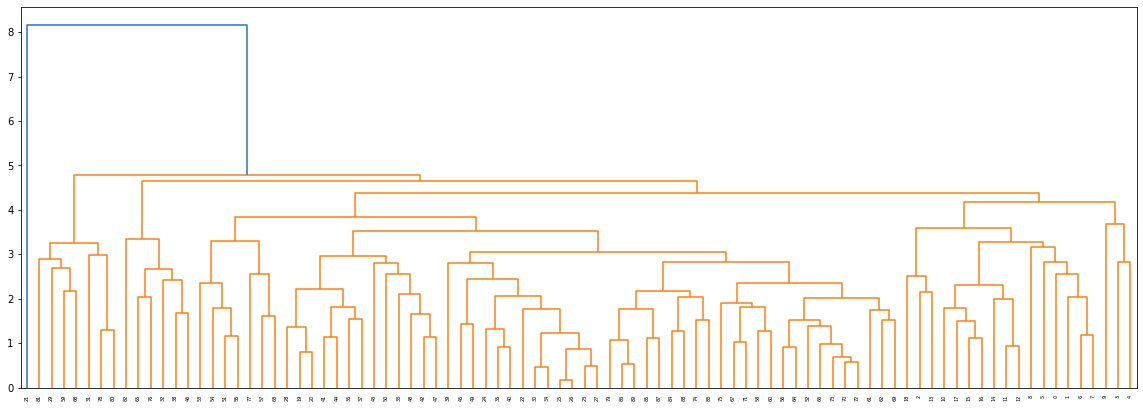

In [52]:
plt.figure(figsize=(20,7))
linkage_data = linkage(dfscaler, method='average', metric='euclidean',)
dendrogram(linkage_data)
plt.show()

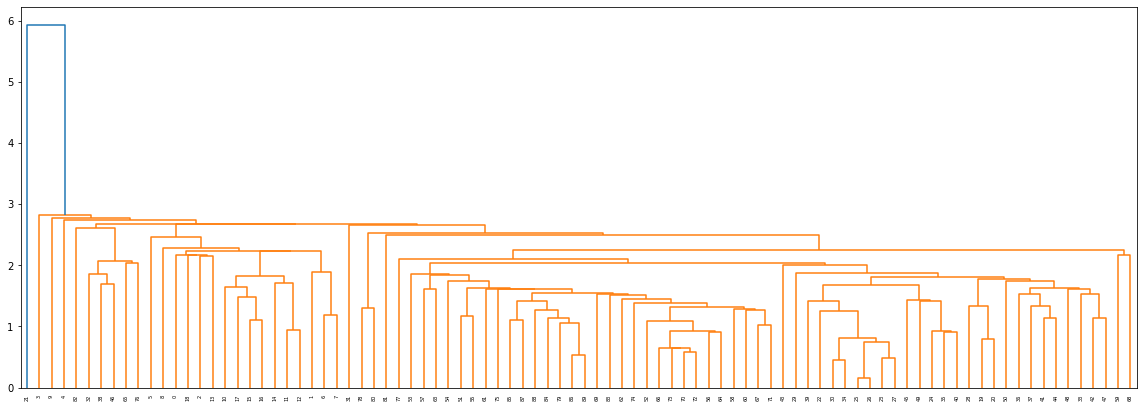

In [53]:
plt.figure(figsize=(20,7))
linkage_data = linkage(dfscaler, method='single', metric='euclidean',)
dendrogram(linkage_data)
plt.show()

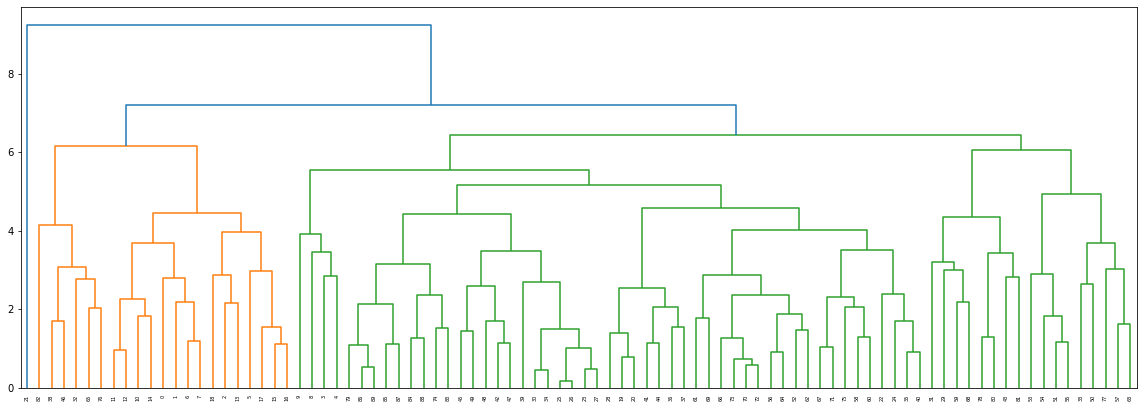

In [54]:
plt.figure(figsize=(20,7))
linkage_data = linkage(dfscaler, method='complete', metric='euclidean',)
dendrogram(linkage_data)
plt.show()

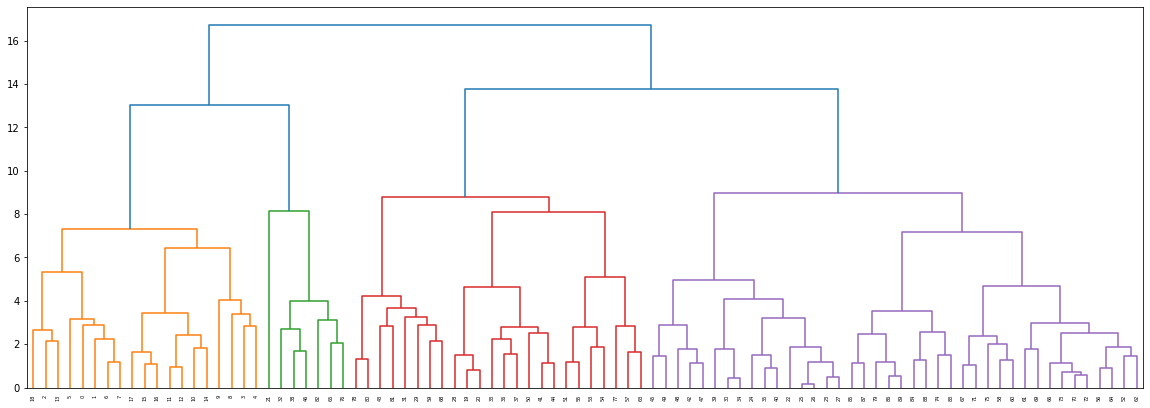

In [55]:
plt.figure(figsize=(20,7))
linkage_data = linkage(dfscaler, method='ward', metric='euclidean',)
dendrogram(linkage_data)
plt.show()